<h1><b><center> Prediksi Biaya Asuransi dan Segmentasi Risiko Nasabah Menggunakan Algoritma Machine Learning </h1>

***

### **A. Gambaran Umum**

Pada industri asuransi, kemampuan untuk dapat memprediksi biaya klaim dari suatu nasabah beserta risikonya akan menjadi aspek yang sangat membantu dalam pengambilan keputusan untuk dapat mempertahankan atau bahkan meningkatkan bisnis. Dengan adanya sebuah prediksi, maka kerugian atau ketidakpuasan pelanggan akibat kendala pengajuan klaim akan dapat dimitigasi sehingga keuntungan bisnis asuransi dapat tetap terjaga

### **B. Tujuan Pengembangan**

Model prediksi biaya dan risiko hadir untuk membantu pihak eksekutif asuransi dalam menentukan tawaran apa yang cocok untuk diberikan kepada nasabah berdasarkan risiko dan jumlah biayanya sehingga meningkatkan efektivitas bisnis

### **C. Deskripsi Dataset**

Dataset yang digunakan dalam proyek ini bersumber dari Kaggle [7] berjudul Medical Cost Personal
Dataset, dengan 2.772 entri dan atribut penting seperti usia, jenis kelamin, BMI, jumlah anak, status
merokok, dan biaya tagihan medis.

### **D. Model**

Terdapat dua model yang digunakna untuk mengembangkan AI ini, yaitu KMeans pada unsupervised learning untuk segmentasi risiko dan beberapa model yang dibandingkan dan menentukan yang terbaik untuk supervised learning dalam melakukan prediksi biaya.

## **1. Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

## **2. Data Preparation**

In [2]:
df = pd.read_csv('medical-insurance-cost-prediction/medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **3. Exploration Data Analysis**

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
print(df.duplicated().sum())

1435


In [8]:
df = df.drop_duplicates()

In [9]:
print(df.duplicated().sum())

0


In [10]:
numerical_columns = df.select_dtypes(include='number').columns
max_values = df[numerical_columns].max().reset_index()
max_values.columns = ['Feature', 'Max Value']
max_values.sort_values(by='Max Value', ascending=False, inplace=True)
max_values

,Feature,Max Value
3,charges,63770.42801
0,age,64.00000
1,bmi,53.13000
2,children,5.00000


In [11]:
numerical_columns = df.select_dtypes(include='number').columns
max_values = df[numerical_columns].min().reset_index()
max_values.columns = ['Feature', 'Max Value']
max_values.sort_values(by='Max Value', ascending=False, inplace=True)
max_values

,Feature,Max Value
3,charges,1121.8739
0,age,18.0000
1,bmi,15.9600
2,children,0.0000


### Numerical Features

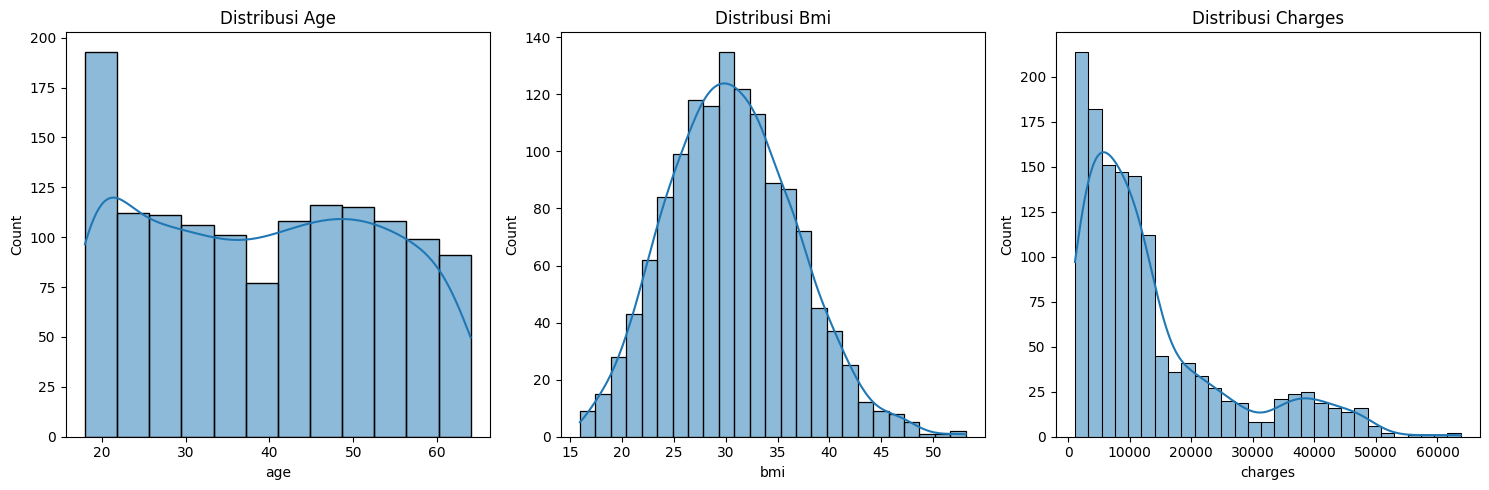

In [12]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['age', 'bmi', 'charges']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col.capitalize()}')
plt.tight_layout()
plt.show()

### Categorical Features

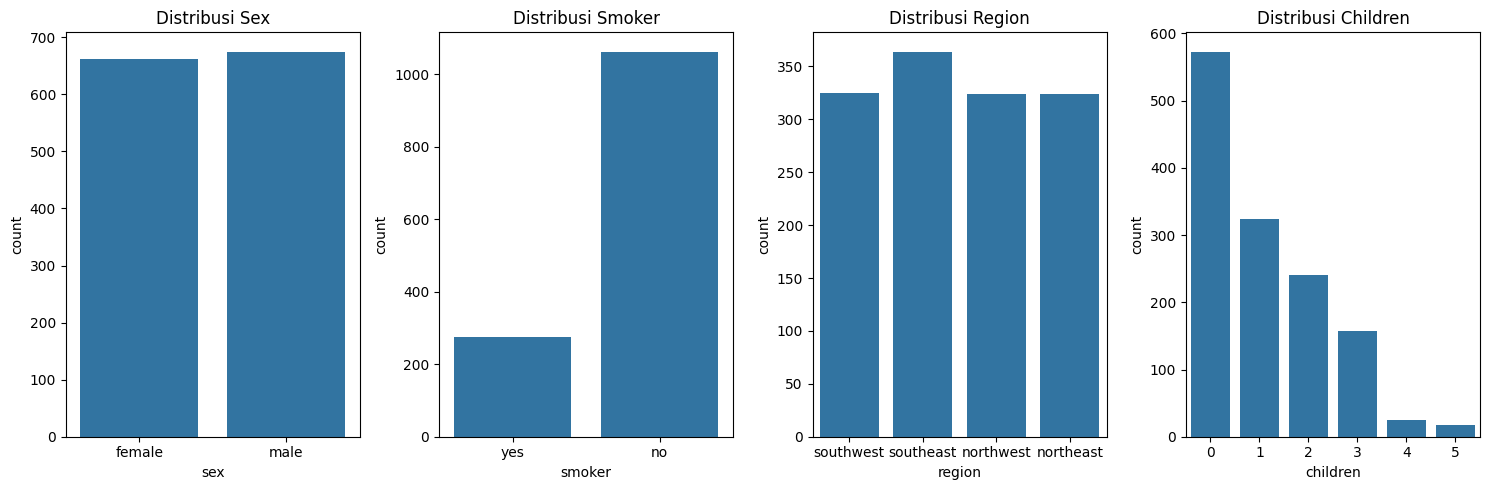

In [13]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['sex', 'smoker', 'region', 'children']):
    plt.subplot(1, 4, i+1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribusi {col.capitalize()}')
plt.tight_layout()
plt.show()

### Correlation

Text(0.5, 1.0, 'Heatmap Korelasi Antar Fitur')

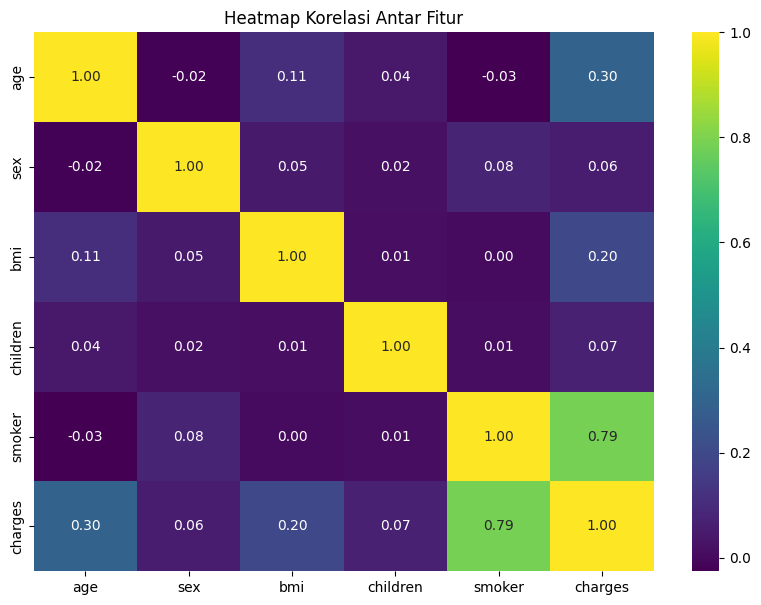

In [14]:
df_corr = df.copy()
df_corr['sex'] = df_corr['sex'].apply(lambda x: 1 if x == 'male' else 0)
df_corr['smoker'] = df_corr['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
plt.figure(figsize=(10, 7))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur')

## **4. Preprocessing Data & Feature Engineering**

### Creating New Features

#### A. Using Combined Feature

In [15]:
def get_bmi_category(bmi):
    if bmi < 18.5: return 'Underweight'
    elif 18.5 <= bmi < 25: return 'Normal'
    elif 25 <= bmi < 30: return 'Overweight'
    else: return 'Obese'

df['bmi_category'] = df['bmi'].apply(get_bmi_category)
df['is_smoker'] = (df['smoker'] == 'yes').astype(int)
df['is_obese'] = (df['bmi_category'] == 'Obese').astype(int)
df['smoker_and_obese'] = df['is_smoker'] * df['is_obese']

In [16]:
print("Data setelah Feature Baru")
display(df.head())

Data setelah Feature Baru


,age,sex,bmi,children,smoker,region,charges,bmi_category,is_smoker,is_obese,smoker_and_obese
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,1,0,0
1,18,male,33.770,1,no,southeast,1725.55230,Obese,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,Obese,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,Normal,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,0,0,0


#### B. Using Unsupervised Learning

In [17]:
features_for_clustering = df[['age', 'bmi', 'is_smoker']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['risk_segment'] = kmeans.fit_predict(scaled_features)

segment_analysis = df.groupby('risk_segment')[['age', 'bmi', 'is_smoker', 'charges']].mean().sort_values(by='charges')
segment_map = {
    segment_analysis.index[0]: 'Low Risk',
    segment_analysis.index[1]: 'Medium Risk',
    segment_analysis.index[2]: 'High Risk'
}
df['risk_segment_label'] = df['risk_segment'].map(segment_map)

In [18]:
print("\n--- Hasil Pelabelan Segmen Risiko (Unsupervised) ---")
print("Jumlah nasabah per segmen:")
print(df['risk_segment_label'].value_counts())
print("\nTampilan Data dengan Label Segmen Baru:")


--- Hasil Pelabelan Segmen Risiko (Unsupervised) ---
Jumlah nasabah per segmen:
risk_segment_label
Medium Risk    547
Low Risk       516
High Risk      274
Name: count, dtype: int64

Tampilan Data dengan Label Segmen Baru:


In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,is_smoker,is_obese,smoker_and_obese,risk_segment,risk_segment_label
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,1,0,0,0,High Risk
1,18,male,33.770,1,no,southeast,1725.55230,Obese,0,1,0,2,Low Risk
2,28,male,33.000,3,no,southeast,4449.46200,Obese,0,1,0,2,Low Risk
3,33,male,22.705,0,no,northwest,21984.47061,Normal,0,0,0,2,Low Risk
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,0,0,0,2,Low Risk


### Preprocessing Data

In [20]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan pipeline preprocessing
categorical_features = ['sex', 'smoker', 'region', 'bmi_category', 'risk_segment_label']
numerical_features = ['age', 'bmi', 'children', 'is_obese', 'smoker_and_obese']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)])

## **5. Modelling**

In [21]:
# Definisikan model-model yang akan dibandingkan
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": HistGradientBoostingRegressor(random_state=42)
}

results_list = []

# Loop untuk melatih dan mengevaluasi setiap model
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results_list.append({'Model': name, 'MAE': mae, 'R2 Score': r2})
    print(f"Model: {name} | MAE: ${mae:,.2f} | R2 Score: {r2:.4f}")


Model: Linear Regression | MAE: $2,419.81 | R2 Score: 0.9045
Model: Random Forest | MAE: $2,677.29 | R2 Score: 0.8783
Model: Gradient Boosting | MAE: $2,808.36 | R2 Score: 0.8827


In [27]:
results_df = pd.DataFrame(results_list)
best_model_name = results_df.loc[results_df['MAE'].idxmin()]['Model']
print(f"\nModel terbaik adalah: **{best_model_name}**")



Model terbaik adalah: **Linear Regression**


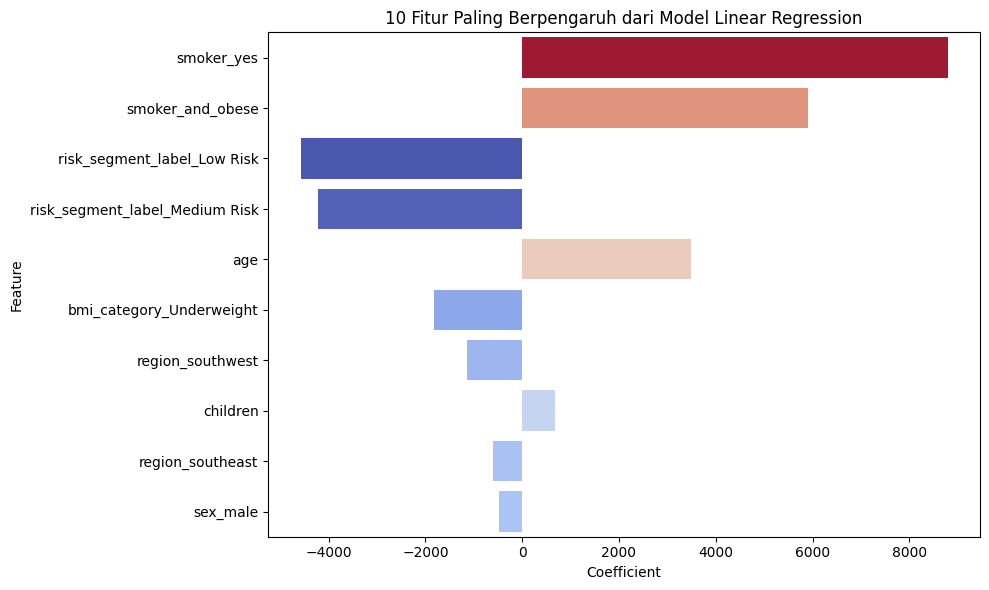

In [29]:
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', models[best_model_name])])
best_pipeline.fit(X_train, y_train)

ohe = best_pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

coefs = best_pipeline.named_steps['regressor'].coef_
final_feature_names = numerical_features + list(ohe_feature_names)

# Buat DataFrame koefisien
coef_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Coefficient': coefs
}).sort_values(by='Coefficient', key=abs, ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(
    data=coef_df,
    x='Coefficient',
    y='Feature',
    hue='Coefficient',
    dodge=False,  
    palette='coolwarm',
    legend=False
)
plt.title(f'10 Fitur Paling Berpengaruh dari Model {best_model_name}')
plt.tight_layout()
plt.show()

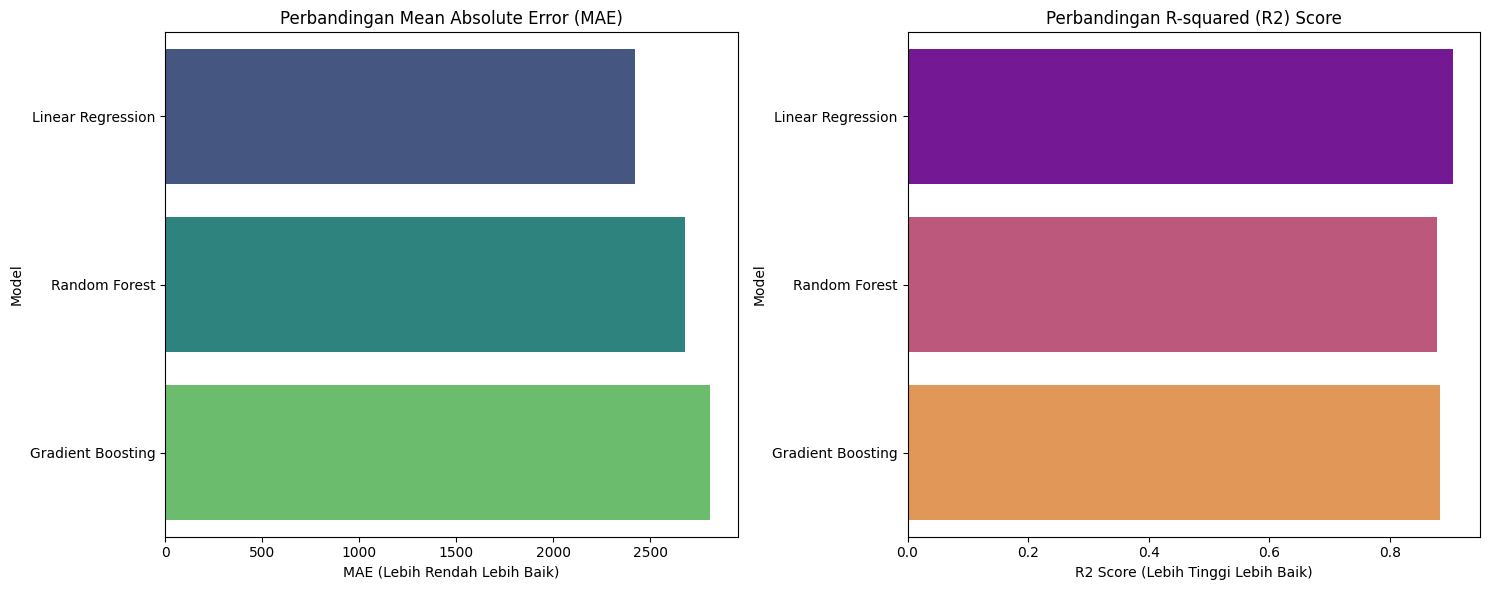

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=results_df, x='MAE', y='Model', hue='Model', ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Perbandingan Mean Absolute Error (MAE)')
axes[0].set_xlabel('MAE (Lebih Rendah Lebih Baik)')

sns.barplot(data=results_df, x='R2 Score', y='Model', hue='Model', ax=axes[1], palette='plasma', legend=False)
axes[1].set_title('Perbandingan R-squared (R2) Score')
axes[1].set_xlabel('R2 Score (Lebih Tinggi Lebih Baik)')

plt.tight_layout()
plt.show()

## **6. Model Saving**

In [25]:
os.makedirs('models', exist_ok=True)

# Model
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', models[best_model_name])])
final_pipeline.fit(X, y)
model_path = os.path.join('models', 'best_insurance_model.joblib')
joblib.dump(final_pipeline, model_path)
print(f"Model terbaik ('{best_model_name}') telah disimpan di: {model_path}")

# Artefact
joblib.dump(kmeans, os.path.join('models', 'kmeans_model.joblib'))
joblib.dump(scaler, os.path.join('models', 'clustering_scaler.joblib'))
print("Model K-Means dan Scaler untuk clustering telah disimpan.")

# Pipeline
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', models[best_model_name])])
final_pipeline.fit(X, y)

joblib.dump(final_pipeline, os.path.join('models', 'prediction_pipeline.joblib'))
print(f"Pipeline prediksi ('{best_model_name}') telah disimpan.")

# Column
model_columns = list(X.columns)
joblib.dump(model_columns, os.path.join('models', 'model_columns.joblib'))
print("Daftar kolom model telah disimpan.")

Model terbaik ('Linear Regression') telah disimpan di: models\best_insurance_model.joblib
Model K-Means dan Scaler untuk clustering telah disimpan.
Pipeline prediksi ('Linear Regression') telah disimpan.
Daftar kolom model telah disimpan.
